#BCG GenAI

Author:  Sarah Pfeiffer

Project:  
<p> Create an AI-powered chatbot that can analyze and provide insights on corporate financial performance from 10-K and 10-Q financial documents.</p>

Requirements:
<p>
Efficiency:  The solution must reduce time taken to analyze financial documents compared to traditional methods.

Accuracy: Chatbot should provide precise and reliable financial insights backed by thorough data analysis.

User-friendly interface: The chatbot should be intuitive and easy to use for the client's dierse client base, regardless of their financial expertise.

Scalability: The solution should be scalable, capable of handling an increasing number of documents and user queries.
</p>





### Import Excel file

From https://www.sec.gov/edgar/searchedgar/companysearch website pull the following figures from the 10-K for the last three years.  

Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash flow from operating activities.

Companies:  Apple, Tesla, Microsoft.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/BCG_GenAI.xlsx')
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from operating activities
0,Microsoft,2023,211915,72361,411976,205753,87582
1,Microsoft,2022,198270,72738,364840,198298,89035
2,Microsoft,2021,168088,61271,333779,191791,76740
3,Tesla,2023,96773,14974,106618,43009,13256
4,Tesla,2022,81462,12587,82338,36440,14724
5,Tesla,2021,53823,5644,62131,30548,11497
6,Apple,2023,383285,96995,352583,290437,110543
7,Apple,2022,394328,99803,352755,302083,122151
8,Apple,2021,365817,94680,351002,287912,104038


### Calculate Shareholder Equity

In [ ]:
df['Shareholder Equity'] = df['Total Assets']-df['Total Liabilities']

### Sort dataframe

In [ ]:
df = df.sort_values(by=['Company', 'Year'])
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from operating activities,Shareholder Equity
8,Apple,2021,365817,94680,351002,287912,104038,63090
7,Apple,2022,394328,99803,352755,302083,122151,50672
6,Apple,2023,383285,96995,352583,290437,110543,62146
2,Microsoft,2021,168088,61271,333779,191791,76740,141988
1,Microsoft,2022,198270,72738,364840,198298,89035,166542
0,Microsoft,2023,211915,72361,411976,205753,87582,206223
5,Tesla,2021,53823,5644,62131,30548,11497,31583
4,Tesla,2022,81462,12587,82338,36440,14724,45898
3,Tesla,2023,96773,14974,106618,43009,13256,63609


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 8 to 3
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Company                              9 non-null      object
 1   Year                                 9 non-null      int64 
 2   Total Revenue                        9 non-null      int64 
 3   Net Income                           9 non-null      int64 
 4   Total Assets                         9 non-null      int64 
 5   Total Liabilities                    9 non-null      int64 
 6   Cash Flow from operating activities  9 non-null      int64 
 7   Shareholder Equity                   9 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 648.0+ bytes


### Calculate year-over-year growth

In [ ]:
# Calculate year-over-year growth
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100
df['Asset Growth (%)'] = df.groupby(['Company'])['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby(['Company'])['Total Liabilities'].pct_change() * 100
df['Equity Growth (%)'] = df.groupby(['Company'])['Shareholder Equity'].pct_change() * 100
df['CF Operating Activities Growth (%)'] = df.groupby(['Company'])['Cash Flow from operating activities'].pct_change() * 100



In [ ]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from operating activities,Shareholder Equity,Revenue Growth (%),Income Growth (%),Asset Growth (%),Liabilities Growth (%),Equity Growth (%),CF Operating Activities Growth (%)
8,Apple,2021,365817,94680,351002,287912,104038,63090,NaN,NaN,NaN,NaN,NaN,NaN
7,Apple,2022,394328,99803,352755,302083,122151,50672,7.793788,5.410858,0.499427,4.921990,-19.682993,17.409985
6,Apple,2023,383285,96995,352583,290437,110543,62146,-2.800461,-2.813543,-0.048759,-3.855232,22.643669,-9.502992
2,Microsoft,2021,168088,61271,333779,191791,76740,141988,NaN,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,89035,166542,17.956071,18.715216,9.305858,3.392756,17.293011,16.021631
0,Microsoft,2023,211915,72361,411976,205753,87582,206223,6.882030,-0.518299,12.919636,3.759493,23.826422,-1.631942
5,Tesla,2021,53823,5644,62131,30548,11497,31583,NaN,NaN,NaN,NaN,NaN,NaN
4,Tesla,2022,81462,12587,82338,36440,14724,45898,51.351653,123.015592,32.523217,19.287678,45.325017,28.068192
3,Tesla,2023,96773,14974,106618,43009,13256,63609,18.795267,18.964010,29.488207,18.026894,38.587738,-9.970117


## Calculate ratios

Ratio formulas are based on www.investopedia.com.

In [ ]:
df['Net Profit Margin'] = df['Net Income']/df['Total Revenue']
df['Debt Ratio'] = df['Total Liabilities']/df['Total Assets']
df['Debt_to_Equity Ratio'] = df['Total Liabilities']/ df['Shareholder Equity']
df['Equity Multiplier'] = df['Total Assets']/df['Shareholder Equity']
df['Cash Flow Coverage Ratio'] = df['Cash Flow from operating activities']/df['Total Liabilities']



In [ ]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from operating activities,Shareholder Equity,Revenue Growth (%),Income Growth (%),Asset Growth (%),Liabilities Growth (%),Equity Growth (%),CF Operating Activities Growth (%),Net Profit Margin,Debt Ratio,Debt_to_Equity Ratio,Equity Multiplier,Cash Flow Coverage Ratio
8,Apple,2021,365817,94680,351002,287912,104038,63090,NaN,NaN,NaN,NaN,NaN,NaN,0.258818,0.820257,4.563512,5.563512,0.361353
7,Apple,2022,394328,99803,352755,302083,122151,50672,7.793788,5.410858,0.499427,4.921990,-19.682993,17.409985,0.253096,0.856354,5.961537,6.961537,0.404362
6,Apple,2023,383285,96995,352583,290437,110543,62146,-2.800461,-2.813543,-0.048759,-3.855232,22.643669,-9.502992,0.253062,0.823741,4.673462,5.673462,0.380609
2,Microsoft,2021,168088,61271,333779,191791,76740,141988,NaN,NaN,NaN,NaN,NaN,NaN,0.364517,0.574605,1.350755,2.350755,0.400123
1,Microsoft,2022,198270,72738,364840,198298,89035,166542,17.956071,18.715216,9.305858,3.392756,17.293011,16.021631,0.366863,0.543520,1.190679,2.190679,0.448996
0,Microsoft,2023,211915,72361,411976,205753,87582,206223,6.882030,-0.518299,12.919636,3.759493,23.826422,-1.631942,0.341462,0.499430,0.997721,1.997721,0.425666
5,Tesla,2021,53823,5644,62131,30548,11497,31583,NaN,NaN,NaN,NaN,NaN,NaN,0.104862,0.491671,0.967229,1.967229,0.376359
4,Tesla,2022,81462,12587,82338,36440,14724,45898,51.351653,123.015592,32.523217,19.287678,45.325017,28.068192,0.154514,0.442566,0.793934,1.793934,0.404061
3,Tesla,2023,96773,14974,106618,43009,13256,63609,18.795267,18.964010,29.488207,18.026894,38.587738,-9.970117,0.154733,0.403393,0.676146,1.676146,0.308215


## Data Analysis

In [ ]:
df[df["Company"] == "Apple"]

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from operating activities,Shareholder Equity,Revenue Growth (%),Income Growth (%),Asset Growth (%),Liabilities Growth (%),Equity Growth (%),CF Operating Activities Growth (%),Net Profit Margin,Debt Ratio,Debt_to_Equity Ratio,Equity Multiplier,Cash Flow Coverage Ratio
8,Apple,2021,365817,94680,351002,287912,104038,63090,NaN,NaN,NaN,NaN,NaN,NaN,0.258818,0.820257,4.563512,5.563512,0.361353
7,Apple,2022,394328,99803,352755,302083,122151,50672,7.793788,5.410858,0.499427,4.921990,-19.682993,17.409985,0.253096,0.856354,5.961537,6.961537,0.404362
6,Apple,2023,383285,96995,352583,290437,110543,62146,-2.800461,-2.813543,-0.048759,-3.855232,22.643669,-9.502992,0.253062,0.823741,4.673462,5.673462,0.380609


### **Apple**

**Revenue Growth:**
<p> Revenue grew 7.8% from 2021 to 2022.  Revenue decreased 2.8% from 2022 to 2023.</p>

**Net Income Growth:**
<p>Income grew 5.4% from 2021 to 2022.  Net Income decreased 2.8% from 2022 to 2023.</p>

**Asset Growth:**
<p>Asset growth was flat.  Assets grew 0.5% from 2021 to 2022 then decreased 0.05% from 2022 to 2023.</p>

**Liability Growth:**
<p>Liabilities grew more than Assets from 2021 to 2023 at 4.9% then decreased 3.9% from 2022 to 2023.</p>

**Cash Flow from Operating Activities Growth:**
<p> Cash flow from operations grew by 17% from 2021 to 2022 then decreased 9.5% from 2022 to 2023.</p>

**Net Profit Margin (Net Income/Total Revenue):**
<p>In 2021, the profit margin was 25.88%.  In 2022, the profit margin was 25.31%. In 2023, the profit margin was 25.31%.  The profit margin has remained steady.</p>

**Debt Ratio (Total Liabilities/Total Assets):**
<p>In 2021, 82% of assets were owned by Creditors.  In 2022, 86% of assets were owned by Creditors.  In 2023, 82% of assets were owned by Creditors. Apple relies heavily on borrowed funds.</p>

**Debt_to_Equity (Total Liabilities/Shareholder Equity):**
<p> In 2021, Apple had 4.56 dollars of debt for every dollar of equity.  In 2022, Apple had 5.96 dollars of debt for every dollar of equity.  In 2023, Apple had 4.67 dollars of debt for every dollar of equity. </p>

**Equity Multiplier (Total Assets/Shareholder Equity):**
<p> In 2021, Apple's assets were 5.56 larger than its equity.  In 2022, Apple's assets were 6.96 larger than its equity.  In 2023, Apple's assets were 5.67 larger than its equity.  Based on the multiplier, approximately 80% of Apple's assets are financed by debt.

**Cash Flow Coverage Ratio (Cash Flow from operating activities/Total Liabilities):**
<p>In 2021, the coverage ratio of .36 indicates it would take Apple 2.78 years to repay it debt.   In 2022, the coverage ratio of .40 indicates it would take Apple 2.5 years to repay its debt.  In 2023, the coverage ratio of .38 indicates it would take Apple 2.63 years to repay it debt. </p>









In [ ]:
df[df["Company"] == "Microsoft"]

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from operating activities,Shareholder Equity,Revenue Growth (%),Income Growth (%),Asset Growth (%),Liabilities Growth (%),Equity Growth (%),CF Operating Activities Growth (%),Net Profit Margin,Debt Ratio,Debt_to_Equity Ratio,Equity Multiplier,Cash Flow Coverage Ratio
2,Microsoft,2021,168088,61271,333779,191791,76740,141988,NaN,NaN,NaN,NaN,NaN,NaN,0.364517,0.574605,1.350755,2.350755,0.400123
1,Microsoft,2022,198270,72738,364840,198298,89035,166542,17.956071,18.715216,9.305858,3.392756,17.293011,16.021631,0.366863,0.543520,1.190679,2.190679,0.448996
0,Microsoft,2023,211915,72361,411976,205753,87582,206223,6.882030,-0.518299,12.919636,3.759493,23.826422,-1.631942,0.341462,0.499430,0.997721,1.997721,0.425666


### **Microsoft**

**Revenue Growth:**
<p>Revenue increased 17.96% from 2021 to 2022.  Revenue increased 6.88% from 2022 to 2023.

**Net Income Growth:**
<p>Net Income increased 18.71% from 2021 to 2022. Net Income decreased 0.52% from 2022 to 2023.</p>

**Total Asset Growth:**
<p>Total Assets increased 9.3% from 2021 to 2022.  Total Assets increased 12.92% from 2022 to 2023.  Assets grew at least 3 times more than Liabilities.</p>

**Total Liability Growth:**
<p>Liabilities increased 3.4% from 2021 to 2022.  Liabilities increased 3.76% from 2022 to 2023. </p>

**Cash Flow from Operating Activities Growth:**
<p> Cash flow grew 16.02% from 2021 to 2022.  Cash flow decreased 1.63% from 2022 to 2023.</p>

**Net Profit Margin (Net Income/Total Revenue):**
<p> In 2021, the company generated 36 cents in profit for every dollar of revenue.  In 2022, the company generated 37 cents in profit for every dollar of revenue.  In 2023, the company generated 34 cents in profit for every dollar of revenue.  The net profit margin has remained consistent.

**Debt Ratio (Total Liabilities/Total Assets):**
<p>In 2021, 57% of assets were owned by creditors. In 2022, 54% of assets were owned by creditors.  In 2023, 50% of assets were owned by creditors.  The percentage of assets owned by creditors has steadily declined.</p>

**Debt_to_Equity (Total Liabilities/Shareholder Equity):**
<p> In 2021, Microsoft had 1.35 dollars of debt for every dollar of equity.  Inc 2022, Microsoft had 1.19 dollars of debt for every dollar of equity.  In 2023, Microsoft had .99 dollars of debt for every dollar of equity.  The debt to equity ratio has steadily declined.</p>

**Equity Multiplier (Total Assets/Shareholder Equity):**
<p> In 2021, Microsoft's assets were 2.35 times equity.  In 2022, Microsoft's assets were 2.19 times equity.  In 2023, Microsoft's assets were 1.99 times equity. Half of Microsoft's assets are financed by debt.  The numbers show a steady decreasing trend.

**Cash Flow Coverage Ratio (Cash Flow from operating activities/Total Liabilities):**
<p>In 2021, the coverage ratio was .40 indicating it would take Microsoft 2.5 years to repay its debt. In 2022, the coverage ratio was .45 indicating it would take Microsoft 2.22 years to repay its debt.  In 2023, the coverage ratio was .43 indicating it would take Microsoft 2.33 years to repay its debt.


In [ ]:
df[df["Company"] == "Tesla"]

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from operating activities,Shareholder Equity,Revenue Growth (%),Income Growth (%),Asset Growth (%),Liabilities Growth (%),Equity Growth (%),CF Operating Activities Growth (%),Net Profit Margin,Debt Ratio,Debt_to_Equity Ratio,Equity Multiplier,Cash Flow Coverage Ratio
5,Tesla,2021,53823,5644,62131,30548,11497,31583,NaN,NaN,NaN,NaN,NaN,NaN,0.104862,0.491671,0.967229,1.967229,0.376359
4,Tesla,2022,81462,12587,82338,36440,14724,45898,51.351653,123.015592,32.523217,19.287678,45.325017,28.068192,0.154514,0.442566,0.793934,1.793934,0.404061
3,Tesla,2023,96773,14974,106618,43009,13256,63609,18.795267,18.964010,29.488207,18.026894,38.587738,-9.970117,0.154733,0.403393,0.676146,1.676146,0.308215


### **Tesla**

**Revenue Growth:**
<p>Revenue grew 51.35% from 2021 to 2022.  Revenue grew 18.8% from 2022 to 2023.</p>

**Net Income Growth:**
<p>Net Income grew 123% from 2021 to 2022. Net Income grew 18.96% from 2022 to 2023.</p>

**Total Asset Growth:**
<p>Assets grew 32.5 from 2021 to 2022.  Assets grew 29.5% from 2022 to 2023.</p>

**Total Liability Growth:**
<p>Liabilities grew 19% from 2021 to 2022.  Liabilities grew from 18% from 2022 to 2023.</p>

**Cash Flow from Operating Activities Growth:**
<p> Cash flow grew 28% from 2021 to 2022.  Cash flow decreased 9.97% from 2022 to 2023.</p>

**Net Profit Margin (Net Income/Total Revenue):**
<p> In 2021, the company generated 11 cents for every dollar of revenue.  In 2022, the company generated 16 cents for every dollar of revenue.  In 2023, the company generated 16 cents for every dollar of revenue.</p>

**Debt Ratio (Total Liabilities/Total Assets):**
<p>In 2021, 49% of assets were owned by creditors. In 2022, 44% of assets were owned by creditors. In 2023, 40% of assets were owned by creditors.</p>

**Debt_to_Equity (Total Liabilities/Shareholder Equity):**
<p>In 2021, Tesla had .97 dollars of debt for every dollar of equity.  In 2022, Tesla had .79 dollars of debt for every dollar of equity.  In 2023, Tesla had .68 dollars of debt for every dollar of equity.</p>

**Equity Multiplier (Total Assets/Shareholder Equity):**
<p>In 2021, Tesla's assets were 1.97 times equity.  In 2022, Tesla's assets were 1.79 times equity. In 2023, Tesla's assets were 1.68 times equity. The ratio has decreased.  Less than half of Tesla's assets are financed by debt.</p>

**Cash Flow Coverage Ratio (Cash Flow from operating activities/Total Liabilities):**
<p>In 2021, the coverage ratio was .38 indicating it would take Tesla 2.63 years to repay its debt.  In 2022, the coverage ratio was .40 indicating it would take 2.5 years for Tesla to repay its debt.  In 2023, the coverage ratio was .31 indicating it would take Tesla 3.23 years for Tesla to repay its debt.</p>





## Data Visualization

### Facts

In [ ]:
facts = ['Total Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Cash Flow from operating activities',
       'Shareholder Equity']

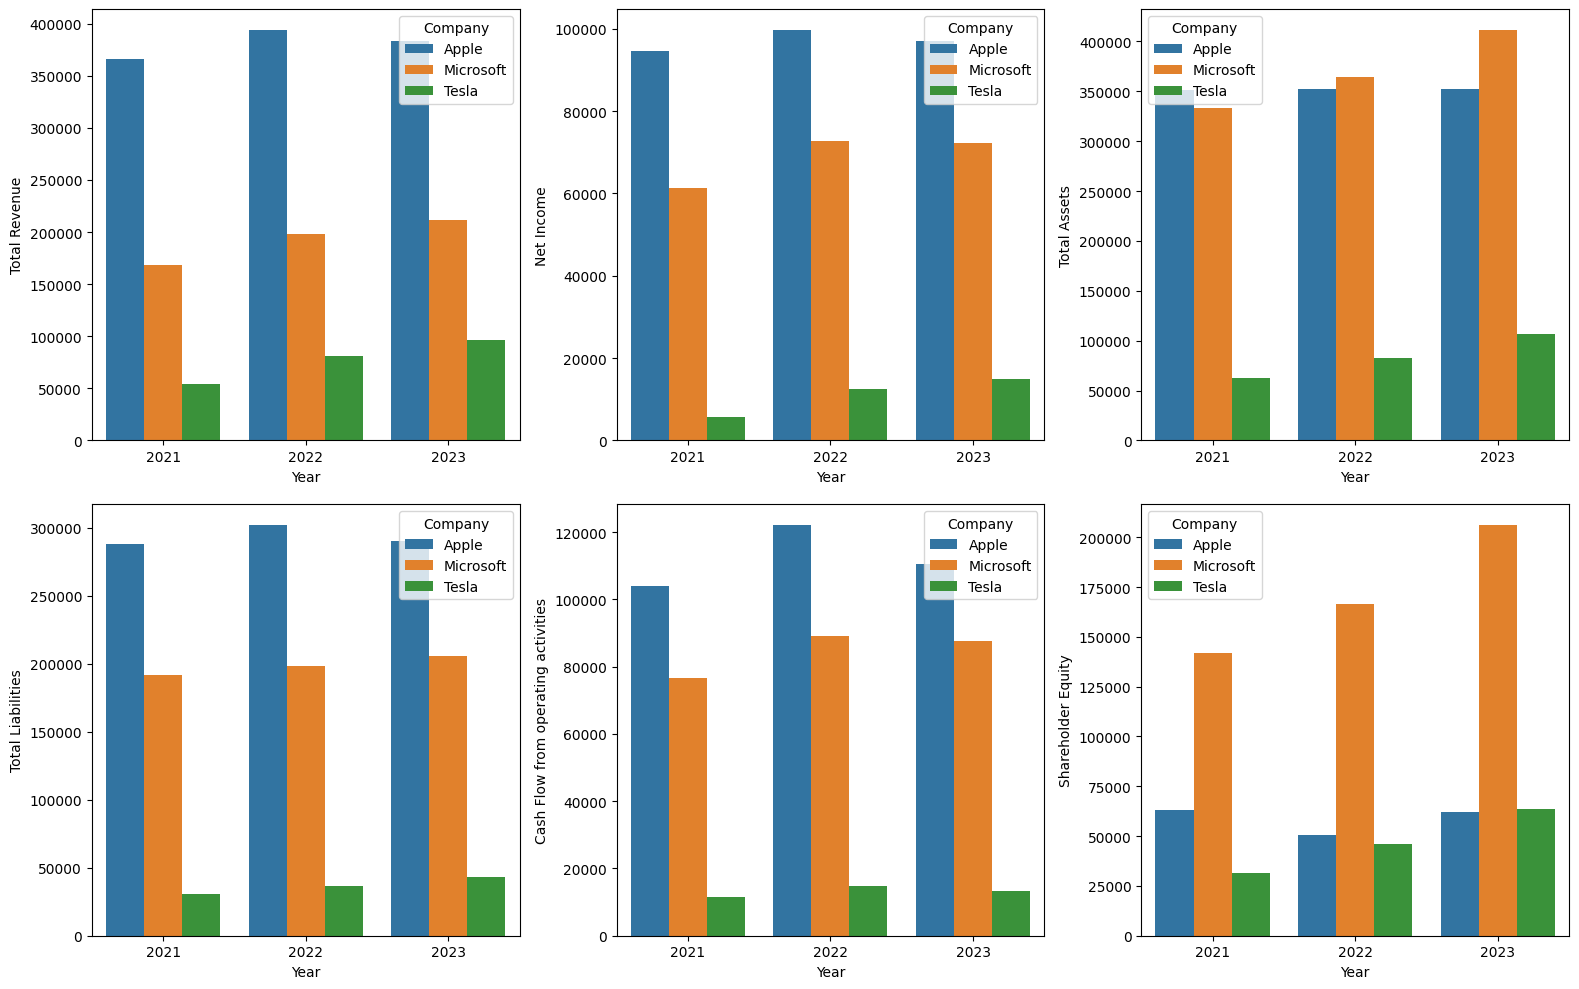

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

for i, feat in enumerate(facts):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    ax = sns.barplot(data=df, x='Year', y=df[feat], hue='Company')



### Growth

In [ ]:
growth = ['Revenue Growth (%)',
       'Income Growth (%)', 'Asset Growth (%)', 'Liabilities Growth (%)',
       'Equity Growth (%)', 'CF Operating Activities Growth (%)']


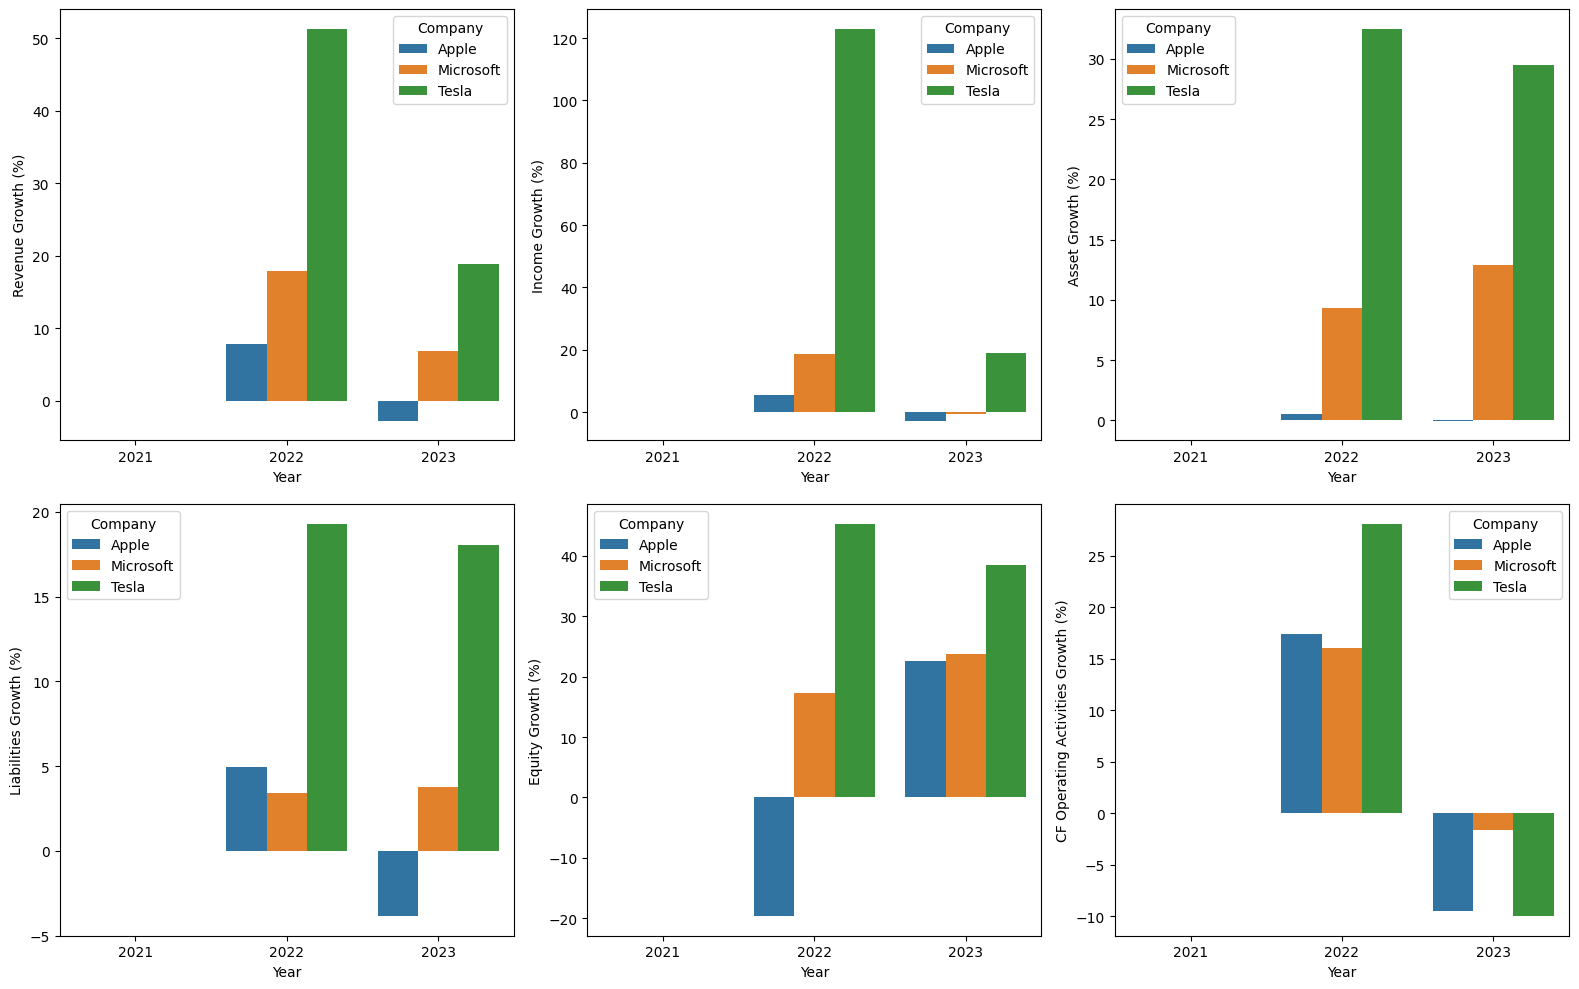

In [ ]:
plt.figure(figsize=(16,10))

for i, feat in enumerate(growth):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    ax = sns.barplot(data=df, x='Year', y=df[feat], hue='Company')

### Ratios

In [ ]:
ratios = [
       'Net Profit Margin', 'Debt Ratio', 'Debt_to_Equity Ratio',
       'Equity Multiplier', 'Cash Flow Coverage Ratio']

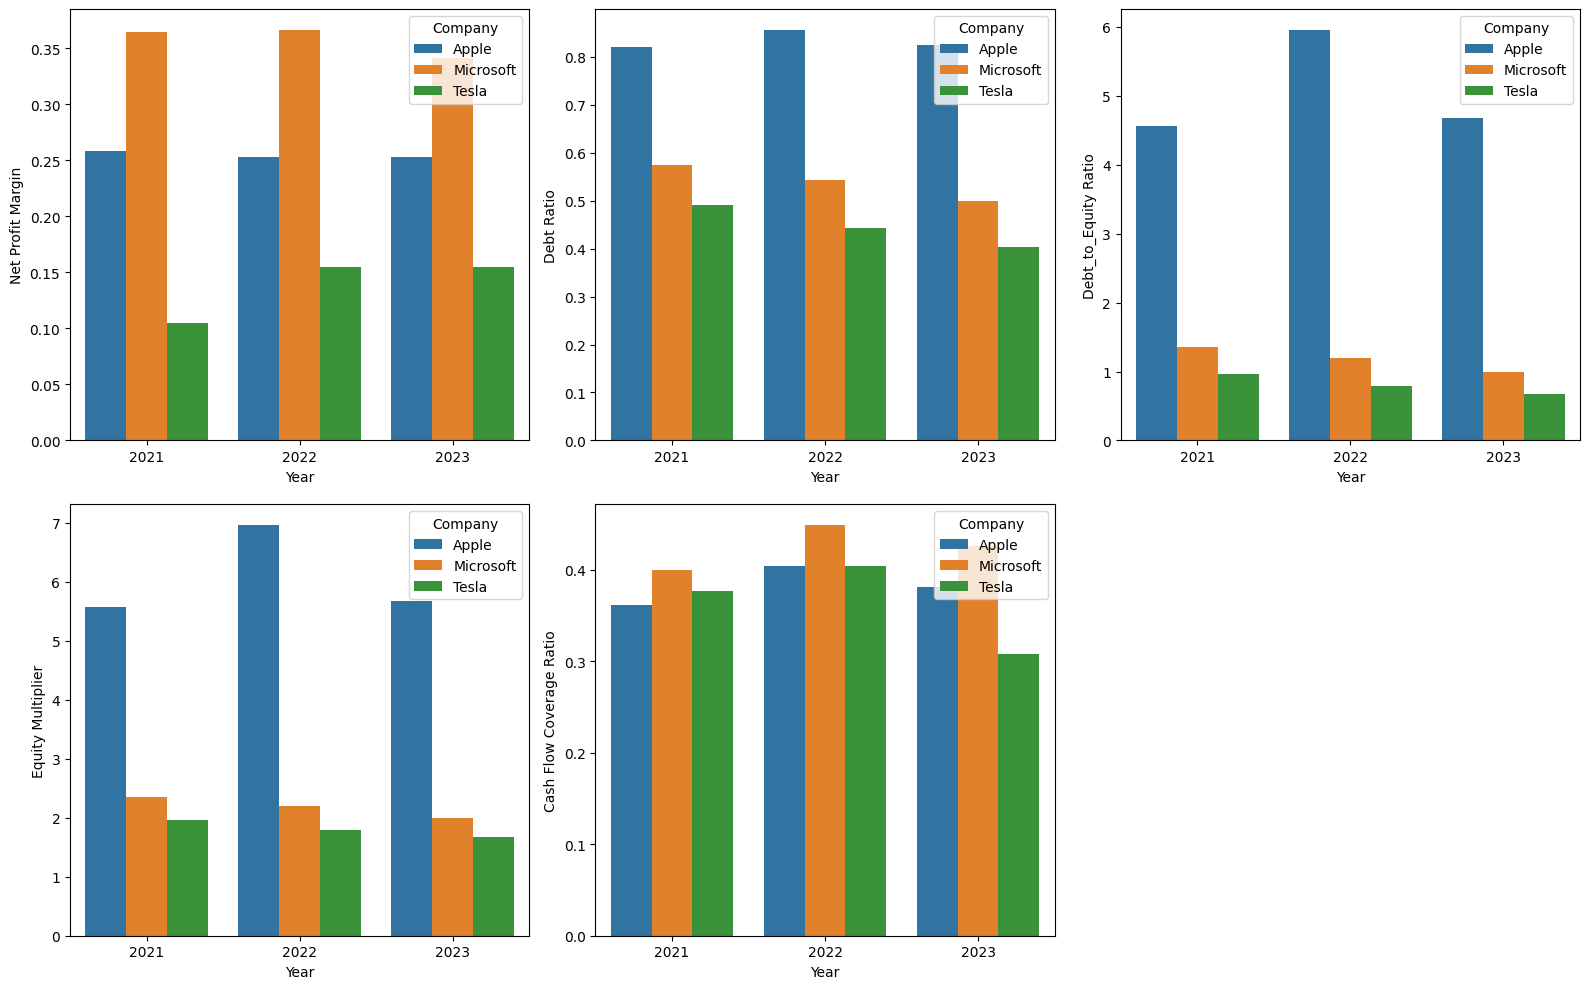

In [ ]:
plt.figure(figsize=(16,10))

for i, feat in enumerate(ratios):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    ax = sns.barplot(data=df, x='Year', y=df[feat], hue='Company')

## Summary

Analyzed data pulled from the 10-K reports of Microsoft, Apple, and Tesla for the period 2021 to 2023.

Data pulled from 10-K:  Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash flow from operating activities.


Highlights:
<p>
Microsoft had the highest shareholder equity and net profit margin for each year in the period.

Microsoft grew it's assets triple the rate of its Liabilities.

Tesla had the highest growth for each of the data items pulled from the 10-K.

Tesla's cash flow from operating activities was very low.

Tesla had low debt and low debt ratios.

Tesla had unusally high revenue and net income growth in 2022.

Apple carried the most debt. 80% of its assets are owned by creditors.

Apple had the highest revenue, net income and cash flow from operating activites for each year in the period.

Apple did not perform well for year-over-year growth.
</p>
